# Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Library used for comparing accuracies with my model implementations
from sklearn.linear_model import LinearRegression

# Function for Mean Absolute Relative Error

In [2]:
mean_absolute_relative_error = lambda y,yhat,epsilon=0.01: (100/y.size)*np.sum((np.abs(y-yhat)/(np.abs(y) + epsilon)))

# Preprocessing of Given Data:-

## 1. Loading Data Set

In [3]:
data = pd.read_excel('./ENB2012_data.xlsx')

## 2. Checking few Rows of Data

In [4]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


## 3. General Description of Data

In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## 4. Checking number of rows with 'NaN'/Null value in each column

In [6]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [7]:
(data == '?').sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

## 5. Checking for count of unique values for each column
### Clearly number of unique values is highest in X1 & X2, followed by X3 & X8. It will be better to include them in our feature set.

In [8]:
data.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

# Exploratory Data Analysis

## Correlation Map of Given Data

### We have X1 & X2 highly correlated with each other, and their correlation with output labels Y1 & Y2 is high. Hence it is better to include only one of them into our feature set. X6, X7, X8 are not correlated with any features, but their correlation with output label Y1 & Y2 is low, hence it won't be of much use.

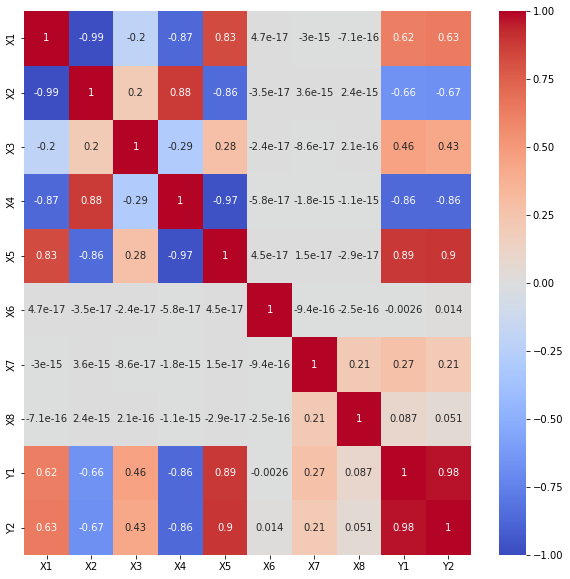

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

## Box Plots

### There are no outliers in the feature set

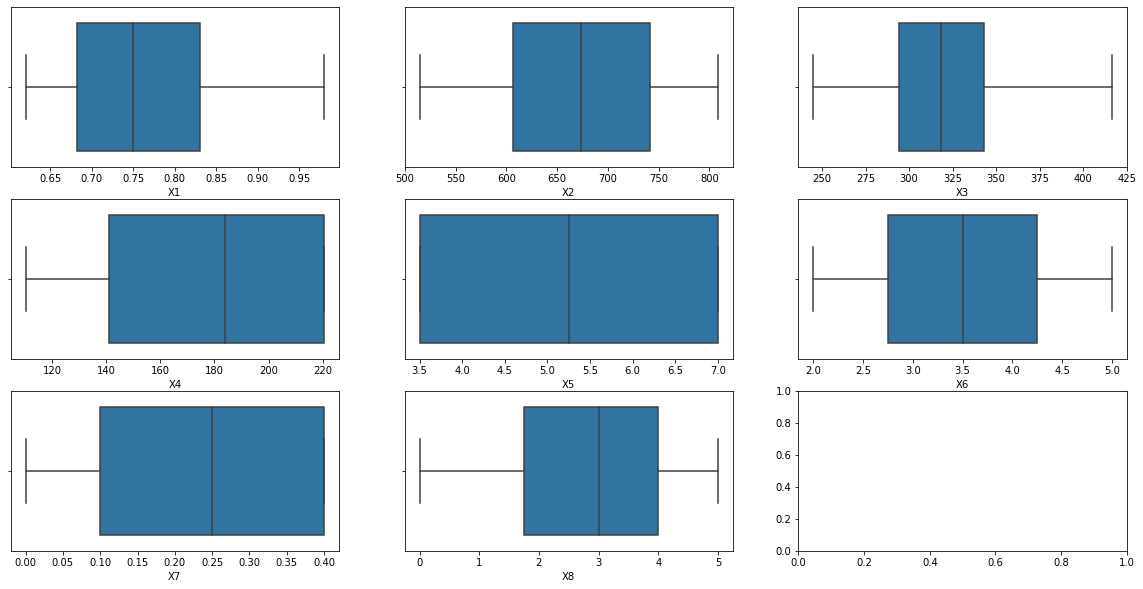

In [10]:
fig, axis = plt.subplots(3,3,figsize=(20,10))
sns.boxplot(ax=axis[0,0],x=data.X1)
sns.boxplot(ax=axis[0,1],x=data.X2)
sns.boxplot(ax=axis[0,2],x=data.X3)
sns.boxplot(ax=axis[1,0],x=data.X4)
sns.boxplot(ax=axis[1,1],x=data.X5)
sns.boxplot(ax=axis[1,2],x=data.X6)
sns.boxplot(ax=axis[2,0],x=data.X7)
sns.boxplot(ax=axis[2,1],x=data.X8)
plt.show()

## Z-Score Normalisation of Given Data

### Since the data set has varying values of magnitude, it can lead to overflows during multiplication operations. Hence 'Z-Score Normalisation' will decrease the magnitude whilst maintaining the older data set properties and correlations

In [11]:
data = (data - data.mean())/data.std()

# Function to Split Data

In [12]:
def split_data(x:np.ndarray,y:np.ndarray,ratio:float,seed:int=0) -> tuple:
    """Splits the given `x` & `y` np.ndarrays into training and test data

    Args:
        x (np.ndarray): Contains features of the data set
        y (np.ndarray): Contains the output label
        ratio (float): Ratio of sizes of training & test data

    Returns:
        tuple: (train_x, test_x, train_y, test_y)
    """
    border = int(ratio*len(x))
    np.random.seed(seed)
    order = np.random.permutation(len(x))   # Gives shuffled order of the indexes of given data set
    x = x[order]
    y = y[order]
    return x[:border],x[border:],y[:border],y[border:]

# -----------------------------------Univariate Section-----------------------------------

## Data Splitting

### Taking 'X2' as feature to predict 'Y1'

In [13]:
x = data['X2'].to_numpy().astype(np.float64)
x = x.reshape(-1,1)
y = data['Y1'].to_numpy().astype(np.float64)
train_x, test_x, train_y, test_y = split_data(x,y,0.6,np.random.randint(0,100))

## Sklearn - Univariate Linear Regression [Implemented for Comparision]

### Sklearn Model to predict Y1

In [14]:
sk_uni_model = LinearRegression()
sk_uni_model.fit(train_x,train_y)

LinearRegression()

### Prediction

In [15]:
sk_train_yhat = sk_uni_model.predict(train_x)
sk_test_yhat = sk_uni_model.predict(test_x)

### Accuracy Metrics

#### For Training Data

##### Mean Squared Error for Y1

In [16]:
print('Y1:',mean_squared_error(train_y,sk_train_yhat))

Y1: 0.5624889048643734


##### Mean Absolute Error for Y1

In [17]:
print('Y1:',mean_absolute_error(train_y,sk_train_yhat))

Y1: 0.5983049834084565


##### Mean Absolute Relative Error for Y1

In [18]:
print('Y1:',mean_absolute_relative_error(train_y,sk_train_yhat))

Y1: 80.378199633205


#### For Test Data

##### Mean Squared Error for Y1

In [19]:
print('Y1:',mean_squared_error(test_y,sk_test_yhat))

Y1: 0.5754720972217224


##### Mean Absolute Error for Y1

In [20]:
print('Y1:',mean_absolute_error(test_y,sk_test_yhat))

Y1: 0.5906527670474346


##### Mean Absolute Relative Error for Y1

In [21]:
print('Y1:',mean_absolute_relative_error(test_y,sk_test_yhat))

Y1: 81.85789250069202


## My Implementation - Univariate Linear Regression

In [22]:
class UnivariateLinearRegression:
    def __init__(self,a:int=0,b:int=0) -> None:
        """Constructor

        Args:
            a (int, optional): Intercept/Bias term. Defaults to 0.
            b (int, optional): Coefficient of feature. Defaults to 0.
        """
        self.a,self.b = a,b
        
    def closed_form_fit(self,train_x:np.ndarray,train_y:np.ndarray) -> None:
        """Performs Closed-Form operation to fit a straight line for the given training features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training output labels
        """
        dup = train_x.flatten()
        n,x1,x2,y1,x1y1 = len(dup),sum(dup),sum(dup*dup),sum(train_y),np.dot(dup,train_y)
        mat1 = np.array([[n,x1],[x1,x2]])
        mat2 = np.array([y1,x1y1])
        mat1 = np.linalg.pinv(mat1)
        self.a,self.b = np.matmul(mat1,mat2)
    
    def gradient_descent_fit(self,train_x:np.ndarray,train_y:np.ndarray,alpha:float) -> None:
        """Performs Gradient-Descent operation to fit a straight line for the given training features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training output labels
            alpha (float): Learning rate
        """
        dup = train_x.flatten()
        n,x1,x2,y1,x1y1 = len(dup),sum(dup),sum(dup*dup),sum(train_y),np.dot(dup,train_y)
        for _ in range(10000):
            self.a -= alpha*2*(n*self.a + self.b*x1 - y1)
            self.b -= alpha*2*(self.a*x1 + self.b*x2 - x1y1)
        
    def predict(self,test_x:np.ndarray) -> np.ndarray:
        """Predicts output label for given input features

        Args:
            test_x (np.ndarray): Test features

        Returns:
            np.ndarray: Predicted output labels
        """
        dup = test_x.flatten()
        return np.array([self.a + self.b*value for value in dup])

### Closed Form Univariate Linear Regression : X2 -> Y1

#### Model for Predicting Y1

In [23]:
uniclosedlrmodel = UnivariateLinearRegression()
uniclosedlrmodel.closed_form_fit(train_x,train_y)

#### Prediction

In [24]:
yhat_train = uniclosedlrmodel.predict(train_x)
yhat_test = uniclosedlrmodel.predict(test_x)

#### Accuracy Metrics

##### For Training Data

Mean Squared Error for Y1

In [25]:
print('Y1:',mean_squared_error(train_y,yhat_train))

Y1: 0.5624889048643734


Mean Absolute Error for Y1

In [26]:
print('Y1:',mean_absolute_error(train_y,yhat_train))

Y1: 0.5983049834084565


Mean Absolute Relative Error for Y1

In [27]:
print('Y1:',mean_absolute_relative_error(train_y,yhat_train))

Y1: 80.378199633205


##### For Test Data 

Mean Squared Error for Y1

In [28]:
print('Y1:',mean_squared_error(test_y,yhat_test))

Y1: 0.5754720972217224


Mean Absolute Error for Y1

In [29]:
print('Y1:',mean_absolute_error(test_y,yhat_test))

Y1: 0.5906527670474349


Mean Absolute Relative Error for Y1

In [30]:
print('Y1:',mean_absolute_relative_error(test_y,yhat_test))

Y1: 81.85789250069203


#### Plot of Y1_real and Y1_pred

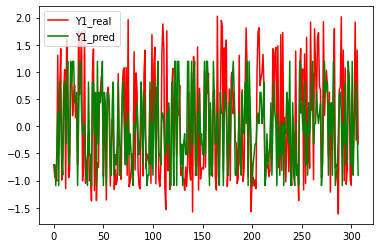

In [31]:
plt.plot(test_y,color='r',label='Y1_real')
plt.plot(yhat_test,color='g',label='Y1_pred')
plt.legend()
plt.show()

#### Plot of Optimal Line for X1 Values

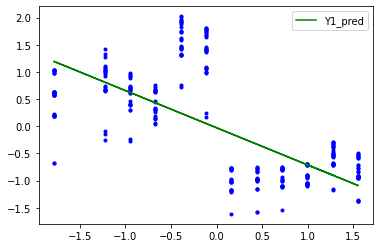

In [32]:
plt.scatter(test_x,test_y,color='b',marker='.')
plt.plot(test_x,yhat_test,color='g',label='Y1_pred')
plt.legend()
plt.show()

#### Kdeplot for Y1_real and Y1_pred

[]

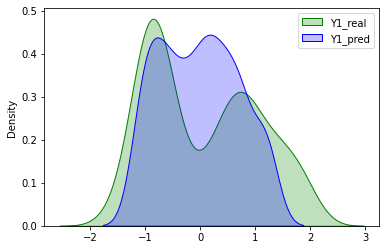

In [33]:
sns.kdeplot(test_y,color='g',shade=True,label='Y1_real')
sns.kdeplot(yhat_test,color='b',shade=True,label='Y1_pred')
plt.legend()
plt.plot()

### Gradient Descent Univariate Linear Regression : X2 -> Y1

#### Model for Predicting Y1

In [34]:
unigradientlrmodel = UnivariateLinearRegression()
unigradientlrmodel.gradient_descent_fit(train_x,train_y,alpha=0.0001)

#### Prediction

In [35]:
yhat_train = unigradientlrmodel.predict(train_x)
yhat_test = unigradientlrmodel.predict(test_x)

#### Accuracy Metrics

##### For Training Data

Mean Squared Error for Y1

In [36]:
print('Y1:',mean_squared_error(train_y,yhat_train))

Y1: 0.5624889048643733


Mean Absolute Error for Y1

In [37]:
print('Y1:',mean_absolute_error(train_y,yhat_train))

Y1: 0.5983049834084565


Mean Absolute Relative Error for Y1

In [38]:
print('Y1:',mean_absolute_relative_error(train_y,yhat_train))

Y1: 80.37819963320497


##### For Test Data

Mean Squared Error for Y1

In [39]:
print('Y1:',mean_squared_error(test_y,yhat_test))

Y1: 0.5754720972217223


Mean Absolute Error for Y1

In [40]:
print('Y1:',mean_absolute_error(test_y,yhat_test))

Y1: 0.5906527670474346


Mean Absolute Relative Error for Y1

In [41]:
print('Y1:',mean_absolute_relative_error(test_y,yhat_test))

Y1: 81.857892500692


#### Plot of Y1_real and Y1_pred

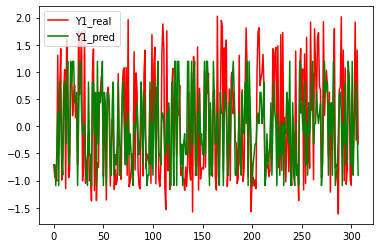

In [42]:
plt.plot(test_y,color='r',label='Y1_real')
plt.plot(yhat_test,color='g',label='Y1_pred')
plt.legend()
plt.show()

#### Plot of Optimal Line for Feature Values

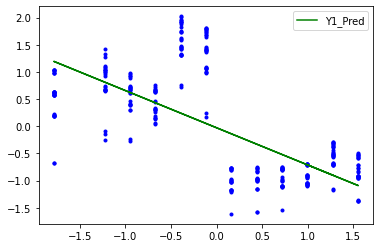

In [43]:
plt.scatter(test_x,test_y,color='b',marker='.')
plt.plot(test_x,yhat_test,color='g',label='Y1_Pred')
plt.legend()
plt.show()

#### Kdeplot for Y1_real and Y1_pred

[]

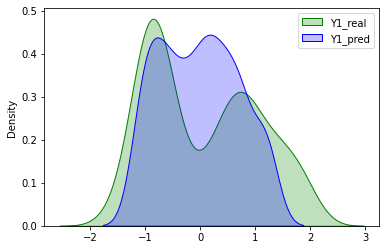

In [44]:
sns.kdeplot(test_y,color='g',shade=True,label='Y1_real')
sns.kdeplot(yhat_test,color='b',shade=True,label='Y1_pred')
plt.legend()
plt.plot()

## Table of Accuracy Metrics

|Models\\Accuracy Metric|MSE-Training|MAE-Training|MARE-Training|MSE-Test|MAE-Test|MARE-Test|
|:-|-|-|-|-|-|-|
|Sklearn|Y1: 0.5624889048643734|Y1: 0.5983049834084565|Y1: 80.378199633205Y1: 0.5754720972217224|Y1: 0.5906527670474346|Y1: 81.85789250069202|
|My Model Closed-Form|Y1: 0.5624889048643734|Y1: 0.5983049834084565|Y1: 80.378199633205|Y1: 0.5754720972217224|Y1: 0.5906527670474349|Y1: 81.85789250069203|
|My Model Gradient-Descent|Y1: 0.5624889048643733|Y1: 0.5983049834084565|Y1: 80.37819963320497|Y1: 0.5754720972217223|Y1: 0.5906527670474346|Y1: 81.857892500692|

# ----------------------------------Multivariate Section----------------------------------

## Data Spliting

### Using 'X2', 'X3' as features and dropping rest of the columns

#### From EDA Section, we have seen that X2 shall produce good predictions, and X3 can be added as a feature as its correlation with X2 is small and has good number of unique values. Clearly, X1 & X2 are highly correlated, hence I have decided to drop X1. The rest of the columns are not correlated with output labels, hence they are of no use and not included as features.

In [45]:
seed = np.random.randint(0,100)
x = data.loc[:,['X2','X3']].to_numpy().astype(np.float64)
y = data.Y1.to_numpy().astype(np.float64)
train_x, test_x, train_y1, test_y1 = split_data(x,y,0.6,seed)
y = data.Y2.to_numpy().astype(np.float64)
train_x, test_x, train_y2, test_y2 = split_data(x,y,0.6,seed)

## Sklearn - Univariate Linear Regression [Implemented for Comparision]

### Model For Predicting Y1

In [46]:
sk_multi_lrmodely1 = LinearRegression()
sk_multi_lrmodely1.fit(train_x,train_y1)

LinearRegression()

### Model For Predicting Y2

In [47]:
sk_multi_lrmodely2 = LinearRegression()
sk_multi_lrmodely2.fit(train_x,train_y2)

LinearRegression()

### Prediction

In [48]:
sk_train_yhat1 = sk_multi_lrmodely1.predict(train_x)
sk_test_yhat1 = sk_multi_lrmodely1.predict(test_x)
sk_train_yhat2 = sk_multi_lrmodely2.predict(train_x)
sk_test_yhat2 = sk_multi_lrmodely2.predict(test_x)

### Accuracy Metrics

#### For Training Data

##### Mean Squared Error

In [49]:
print('Y1:',mean_squared_error(train_y1,sk_train_yhat1),'Y2:',mean_squared_error(train_y2,sk_train_yhat2))

Y1: 0.21099451364464397 Y2: 0.24501437696832565


##### Mean Absolute Error

In [50]:
print('Y1:',mean_absolute_error(train_y1,sk_train_yhat1),'Y2:',mean_absolute_error(train_y2,sk_train_yhat2))

Y1: 0.3288533449534846 Y2: 0.35468094694407326


##### Mean Absolute Relative Error

In [51]:
print('Y1:',mean_absolute_relative_error(train_y1,sk_train_yhat1),'Y2:',mean_absolute_relative_error(train_y2,sk_train_yhat2))

Y1: 57.75017759860036 Y2: 82.19920216862695


#### For Test Data

##### Mean Squared Error

In [52]:
print('Y1:',mean_squared_error(test_y1,sk_test_yhat1),'Y2:',mean_squared_error(test_y2,sk_test_yhat2))

Y1: 0.2135386815299644 Y2: 0.18971144140512905


##### Mean Absolute Error

In [53]:
print('Y1:',mean_absolute_error(test_y1,sk_test_yhat1),'Y2:',mean_absolute_error(test_y2,sk_test_yhat2))

Y1: 0.32298438134079904 Y2: 0.3146869031989912


##### Mean Relative Absolute Error

In [54]:
print('Y1:',mean_absolute_relative_error(test_y1,sk_test_yhat1),'Y2:',mean_absolute_relative_error(test_y2,sk_test_yhat2))

Y1: 62.40653310391452 Y2: 85.71396013788316


## My Implementation - Multivariate Linear Regression

In [55]:
class MultivariateLinearRegression:
    def __init__(self) -> None:
        """Constructor
        """
        pass
    
    def closed_form_fit(self,train_x:np.ndarray,train_y:np.ndarray) -> None:
        """Performs Closed-Form operation to fit a straight line for the given training features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training output labels
        """
        x = np.hstack((train_x,np.ones((len(train_x),1))))
        y = train_y.reshape(len(train_y),1)
        mat1 = np.matmul(np.transpose(x),x)
        mat2 = np.matmul(np.transpose(x),y)
        self.w = np.matmul(np.linalg.pinv(mat1),mat2).flatten()
        
    def gradient_descent_fit(self,train_x:np.ndarray,train_y:np.ndarray,alpha:float=0.1) -> None:
        """Performs Gradient-Descent operation to fit a straight line for the given training features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training output labels
            alpha (float, optional): Learning Rate. Defaults to 0.1.
        """
        self.w = np.ones((len(train_x[0])+1,1),dtype=np.float64)
        y = train_y.reshape(len(train_y),1)
        x = np.hstack((train_x,np.ones((len(train_x),1))))
        xt = np.transpose(x)
        for _ in range(500):
            mat1 = np.matmul(xt,x)
            mat1 = np.matmul(mat1,self.w)
            mat2 = np.matmul(xt,y)
            self.w -= alpha*2*(mat1 - mat2)
        self.w = self.w.flatten()
    
    def predict(self,test_x:np.ndarray) -> np.ndarray:
        """Predicts output label for given input features

        Args:
            test_x (np.ndarray): Test features

        Returns:
            np.ndarray: Predicted output labels
        """
        x = np.hstack((test_x,np.ones((len(test_x),1))))
        ans = [np.dot(self.w,xi) for xi in x]
        return np.array(ans)

### Closed Form Multivariate Linear Regression : X2,X3 -> Y1,Y2

#### Model For Predicting Y1

In [56]:
multiclosedlrmodely1 = MultivariateLinearRegression()
multiclosedlrmodely1.closed_form_fit(train_x,train_y1)

#### Model For Predicting Y2

In [57]:
multiclosedlrmodely2 = MultivariateLinearRegression()
multiclosedlrmodely2.closed_form_fit(train_x,train_y2)

#### Prediction

In [58]:
yhat1_train = multiclosedlrmodely1.predict(train_x)
yhat1_test = multiclosedlrmodely1.predict(test_x)
yhat2_train = multiclosedlrmodely2.predict(train_x)
yhat2_test = multiclosedlrmodely2.predict(test_x)

#### Accuracy Metrics

##### For Training Data

Mean Squared Error

In [59]:
print('Y1:',mean_squared_error(train_y1,yhat1_train),'Y2:',mean_squared_error(train_y2,yhat2_train))

Y1: 0.21099451364464403 Y2: 0.24501437696832556


Mean Absolute Error

In [60]:
print('Y1:',mean_absolute_error(train_y1,yhat1_train),'Y2:',mean_absolute_error(train_y2,yhat2_train))

Y1: 0.32885334495348467 Y2: 0.35468094694407337


Mean Absolute Relative Error

In [61]:
print('Y1:',mean_absolute_relative_error(train_y1,yhat1_train),'Y2:',mean_absolute_relative_error(train_y2,yhat2_train))

Y1: 57.750177598600374 Y2: 82.19920216862697


##### For Test Data

Mean Squared Error

In [62]:
print('Y1:',mean_squared_error(test_y1,yhat1_test),'Y2:',mean_squared_error(test_y2,yhat2_test))

Y1: 0.21353868152996447 Y2: 0.1897114414051291


Mean Absolute Error

In [63]:
print('Y1:',mean_absolute_error(test_y1,yhat1_test),'Y2:',mean_absolute_error(test_y2,yhat2_test))

Y1: 0.3229843813407991 Y2: 0.31468690319899123


Mean Absolute Relative Error

In [64]:
print('Y1:',mean_absolute_relative_error(test_y1,yhat1_test),'Y2:',mean_absolute_relative_error(test_y2,yhat2_test))

Y1: 62.406533103914526 Y2: 85.71396013788318


#### Plot of Y1_real vs Y1_pred

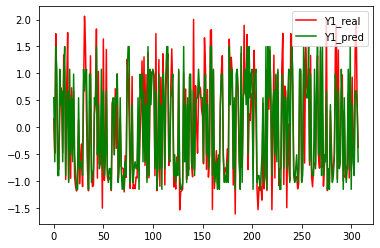

In [65]:
plt.plot(test_y1,color='r',label='Y1_real')
plt.plot(yhat1_test,color='g',label='Y1_pred')
plt.legend()
plt.show()

#### Kdeplot for Y1_real and Y1_pred

[]

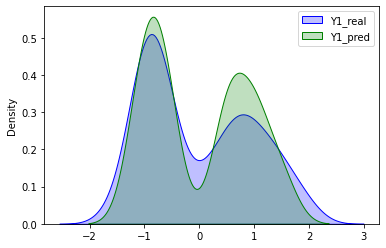

In [66]:
sns.kdeplot(test_y1,color='b',shade=True,label='Y1_real')
sns.kdeplot(yhat1_test,color='g',shade=True,label='Y1_pred')
plt.legend()
plt.plot()

#### Plot of Y2_real vs Y2_pred

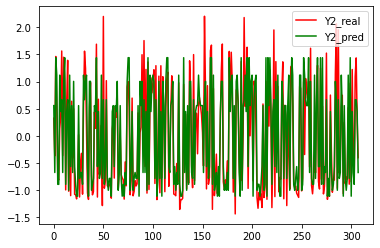

In [67]:
plt.plot(test_y2,color='r',label='Y2_real')
plt.plot(yhat2_test,color='g',label='Y2_pred')
plt.legend()
plt.show()

#### Kdeplot for Y2_real and Y2_pred

[]

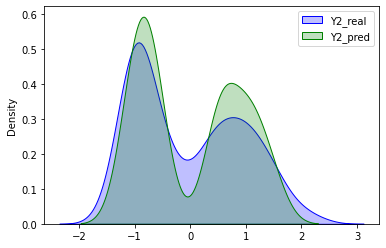

In [68]:
sns.kdeplot(test_y2,color='b',shade=True,label='Y2_real')
sns.kdeplot(yhat2_test,color='g',shade=True,label='Y2_pred')
plt.legend()
plt.plot()

### Gradient Descent Multivariate Linear Regression : X2,X3 -> Y1,Y2

#### Model For Predicting For Y1

In [69]:
multigradientlrmodely1 = MultivariateLinearRegression()
multigradientlrmodely1.gradient_descent_fit(train_x,train_y1,0.001)

#### Model For Predicting Y2

In [70]:
multigradientlrmodely2 = MultivariateLinearRegression()
multigradientlrmodely2.gradient_descent_fit(train_x,train_y2,0.001)

#### Prediction

In [71]:
yhat1_train = multigradientlrmodely1.predict(train_x)
yhat1_test = multigradientlrmodely1.predict(test_x)
yhat2_train = multigradientlrmodely2.predict(train_x)
yhat2_test = multigradientlrmodely2.predict(test_x)

#### Accuracy Metrics

##### For Training Data

Mean Squared Error

In [72]:
print('Y1:',mean_squared_error(train_y1,yhat1_train),'Y2:',mean_squared_error(train_y2,yhat2_train))

Y1: 0.21099451364464403 Y2: 0.24501437696832565


Mean Absolute Error

In [73]:
print('Y1:',mean_absolute_error(train_y1,yhat1_train),'Y2:',mean_absolute_error(train_y2,yhat2_train))

Y1: 0.32885334495348467 Y2: 0.3546809469440734


Mean Absolute Relative Error

In [74]:
print('Y1:',mean_absolute_relative_error(train_y1,yhat1_train),'Y2:',mean_absolute_relative_error(train_y2,yhat2_train))

Y1: 57.750177598600374 Y2: 82.19920216862694


##### For Test Data 

Mean Squared Error

In [75]:
print('Y1:',mean_squared_error(test_y1,yhat1_test),'Y2:',mean_squared_error(test_y2,yhat2_test))

Y1: 0.21353868152996447 Y2: 0.18971144140512913


Mean Absolute Error

In [76]:
print('Y1:',mean_absolute_error(test_y1,yhat1_test),'Y2:',mean_absolute_error(test_y2,yhat2_test))

Y1: 0.3229843813407991 Y2: 0.31468690319899123


Mean Absolute Relative Error

In [77]:
print('Y1:',mean_absolute_relative_error(test_y1,yhat1_test),'Y2:',mean_absolute_relative_error(test_y2,yhat2_test))

Y1: 62.406533103914526 Y2: 85.71396013788316


#### Plot of Y1_real vs Y1_pred

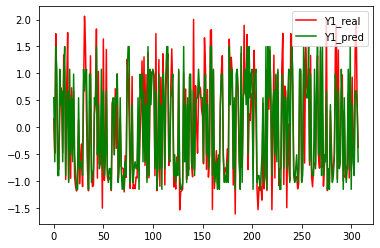

In [78]:
plt.plot(test_y1,color='r',label='Y1_real')
plt.plot(yhat1_test,color='g',label='Y1_pred')
plt.legend()
plt.show()

#### Kdeplot for Y1_real and Y1_pred

[]

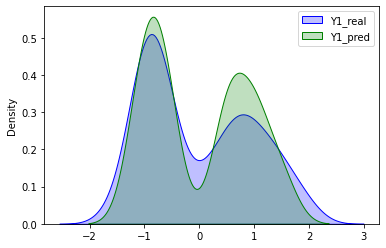

In [79]:
sns.kdeplot(test_y1,color='b',shade=True,label='Y1_real')
sns.kdeplot(yhat1_test,color='g',shade=True,label='Y1_pred')
plt.legend()
plt.plot()

#### Plot of Y2_real vs Y2_pred

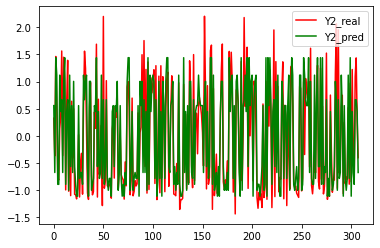

In [80]:
plt.plot(test_y2,color='r',label='Y2_real')
plt.plot(yhat2_test,color='g',label='Y2_pred')
plt.legend()
plt.show()

#### Kdeplot for Y2_real and Y2_pred

[]

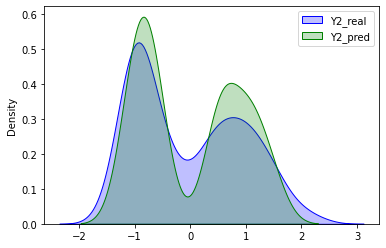

In [81]:
sns.kdeplot(test_y2,color='b',shade=True,label='Y2_real')
sns.kdeplot(yhat2_test,color='g',shade=True,label='Y2_pred')
plt.legend()
plt.plot()

## Table of Accuracy Metrics

|Models\\Accuracy Metric|MSE-Training|MAE-Training|MARE-Training|MSE-Test|MAE-Test|MARE-Test|
|:-|-|-|-|-|-|-|
|Sklearn|Y1: 0.21099451364464397 Y2: 0.24501437696832565|Y1: 0.3288533449534846 Y2: 0.35468094694407326|Y1: 57.75017759860036 Y2: 82.19920216862695|Y1: 0.2135386815299644 Y2: 0.18971144140512905|Y1: 0.32298438134079904 Y2: 0.3146869031989912|Y1: 62.40653310391452 Y2: 85.71396013788316|
|My Model Closed-Form|Y1: 0.21883203624100686 Y2: 0.22703584767421908|Y1: 0.32827278589908443 Y2: 0.33780845435346224|Y1: 53.85947997074582 Y2: 78.27589912853027|Y1: 0.20134757267165662 Y2: 0.21550027687835996|Y1: 0.3207607762235133 Y2: 0.3300699163540387|Y1: 62.50729875653043 Y2: 80.18678616574047|
|My Model Gradient-Descent|Y1: 0.21099451364464403 Y2: 0.24501437696832556|Y1: 0.32885334495348467 Y2: 0.35468094694407337|Y1: 57.750177598600374 Y2: 82.19920216862697|Y1: 0.21353868152996447 Y2: 0.1897114414051291|Y1: 0.3229843813407991 Y2: 0.31468690319899123|Y1: 62.406533103914526 Y2: 85.71396013788318|